|||
|---|---|
|Title|nwtimetracking|
|Author|numbworks|
|Version|5.0.1|
||Please check [docs/docs-nwtimetracking.md](../docs/docs-nwtimetracking.md) before proceeding.|

#### Global Modules

#### Local Modules

In [76]:
from nwtimetracking import SettingBag, ComponentBag, TimeTrackingProcessor, OPTION

#### Functions : Temp

#### Settings

In [ ]:
setting_bag : SettingBag = SettingBag(
    options_tt = [OPTION.display],
    options_tts_by_month = [OPTION.display_c, OPTION.save, OPTION.logset],
    options_tts_by_year = [OPTION.display, OPTION.logset],
    options_tts_by_year_month = [OPTION.display, OPTION.logset],
    options_tts_by_year_month_spnv = [OPTION.display, OPTION.logset],
    options_tts_by_year_spnv = [],
    options_tts_by_spn = [OPTION.display, OPTION.logset],
    options_tts_by_spn_spv = [],
    options_tts_by_hashtag = [OPTION.display],
    options_tts_by_hashtag_year = [OPTION.display, OPTION.logset],
    options_tts_by_efs = [OPTION.display],
    options_tts_by_tr = [OPTION.display],
    options_tts_gantt_spnv = [OPTION.display, OPTION.plot, OPTION.logterm, OPTION.logset],
    options_tts_gantt_hseq = [OPTION.display, OPTION.plot, OPTION.logterm, OPTION.logset],
    options_definitions = [],
    excel_nrows = 1493,
    tts_by_year_month_spnv_display_only_spn = "nwapolloanalytics",
    tts_by_year_spnv_display_only_spn = "nwapolloanalytics",
    tts_by_spn_spv_display_only_spn = "nwapolloanalytics",
    tts_gantt_spnv_months = 3,
    tts_gantt_spnv_min_duration = 1,
    tts_gantt_hseq_months = 2,
    tts_gantt_hseq_min_duration = 1
)

#### Main : Analysis

In [78]:
tt_processor : TimeTrackingProcessor = TimeTrackingProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
tt_processor.initialize()
tt_processor.process_tt()

Date,StartTime,EndTime,Effort,Hashtag,Descriptor,IsSoftwareProject,IsReleaseDay,Year,Month
2025-05-02,08:00,08:30,0h 30m,#studying,,False,False,2025,5
2025-05-02,17:15,17:45,0h 30m,#studying,,False,False,2025,5
2025-05-05,08:00,09:30,1h 30m,#studying,,False,False,2025,5
2025-05-05,11:00,13:00,2h 00m,#studying,,False,False,2025,5
2025-05-05,18:00,20:00,2h 00m,#studying,,False,False,2025,5


In [79]:
tt_processor.process_tts_by_month()

Month,2015,↕,2016,↕,2017,↕,2018
1,00h 00m,↑,18h 00m,↑,88h 30m,↓,80h 15m
2,00h 00m,↑,45h 30m,↑,65h 30m,↑,90h 45m
3,00h 00m,↑,20h 45m,↑,71h 45m,↑,89h 00m
4,00h 00m,↑,37h 30m,↑,68h 00m,↑,88h 30m
5,00h 00m,↑,53h 00m,↑,83h 00m,↑,91h 15m
6,00h 00m,↑,57h 45m,↓,37h 45m,↑,62h 00m
7,00h 00m,↑,46h 45m,↑,65h 30m,↑,69h 30m
8,00h 00m,↑,25h 45m,↑,45h 45m,↑,72h 00m
9,00h 00m,↑,89h 30m,↓,43h 45m,↑,64h 00m
10,08h 00m,↑,82h 15m,↓,64h 30m,↓,46h 45m


Month,2018,↕,2019,↕,2020,↕,2021
1,80h 15m,↓,60h 00m,↓,29h 15m,↑,53h 00m
2,90h 45m,↓,73h 00m,↓,38h 00m,↓,31h 30m
3,89h 00m,↓,75h 30m,↓,35h 00m,↑,40h 30m
4,88h 30m,↓,59h 45m,↓,40h 45m,↓,19h 00m
5,91h 15m,↓,54h 45m,↓,14h 30m,↑,112h 45m
6,62h 00m,↓,29h 15m,↓,12h 00m,↑,54h 00m
7,69h 30m,↓,24h 15m,↑,34h 00m,↓,23h 30m
8,72h 00m,↓,06h 00m,↑,32h 00m,↑,110h 00m
9,64h 00m,↓,39h 00m,↑,44h 00m,↓,43h 30m
10,46h 45m,↓,45h 30m,↑,48h 00m,↓,35h 30m


Month,2021,↕,2022,↕,2023,↕,2024
1,53h 00m,↓,00h 00m,↑,06h 00m,↑,45h 45m
2,31h 30m,↓,03h 00m,↑,24h 00m,↑,77h 45m
3,40h 30m,↓,06h 15m,↑,50h 15m,↑,77h 45m
4,19h 00m,↑,27h 30m,↓,19h 00m,↑,29h 30m
5,112h 45m,↓,49h 45m,↓,31h 00m,↑,43h 00m
6,54h 00m,↑,73h 30m,↓,24h 45m,↑,48h 00m
7,23h 30m,↑,51h 00m,↓,16h 30m,↑,67h 00m
8,110h 00m,↓,36h 30m,↑,41h 30m,↓,32h 45m
9,43h 30m,↑,69h 00m,↓,50h 15m,↓,48h 00m
10,35h 30m,↑,38h 30m,↓,20h 00m,↑,101h 30m


Month,2024,↕,2025
1,45h 45m,↑,79h 00m
2,77h 45m,↓,74h 00m
3,77h 45m,↓,38h 15m
4,29h 30m,↑,103h 00m
5,43h 00m,↓,07h 00m
6,48h 00m,,
7,67h 00m,,
8,32h 45m,,
9,48h 00m,,
10,101h 30m,,


Relevant Settings: {"tts_by_month_effort_highlight": true, "tts_by_month_effort_highlight_mode": "top_three_efforts"}
This content (id: 'tts_by_month') has been successfully saved as '/home/nwtimetracking/TIMETRACKINGBYMONTH.md'.


In [80]:
tt_processor.process_tts_by_year()

Year,Effort,YearlyTarget,TargetDiff,IsTargetMet
2015,18h 00m,00h 00m,+18h 00m,True
2016,615h 15m,500h 00m,+115h 15m,True
2017,762h 45m,500h 00m,+262h 45m,True
2018,829h 45m,500h 00m,+329h 45m,True
2019,515h 15m,500h 00m,+15h 15m,True
2020,470h 30m,500h 00m,-30h 30m,False
2021,537h 30m,500h 00m,+37h 30m,True
2022,467h 30m,400h 00m,+67h 30m,True
2023,320h 15m,250h 00m,+70h 15m,True
2024,862h 30m,500h 00m,+362h 30m,True


Relevant Settings: {"tts_by_year_effort_highlight": true, "tts_by_year_effort_highlight_mode": "top_three_efforts"}


In [81]:
tt_processor.process_tts_by_year_month()

Year,Month,Effort,YearlyTotal,ToTarget
2025,1,79h 00m,79h 00m,-421h 00m
2025,2,74h 00m,153h 00m,-347h 00m
2025,3,38h 15m,191h 15m,-309h 15m
2025,4,103h 00m,294h 15m,-206h 15m
2025,5,07h 00m,301h 15m,-199h 15m


Relevant Settings: {"tts_by_year_month_effort_highlight": true, "tts_by_year_month_effort_highlight_mode": "top_three_efforts"}


In [82]:
tt_processor.process_tts_by_year_month_spnv()

Year,Month,ProjectName,ProjectVersion,Effort,DME,%_DME,TME,%_TME
2025,1,nwapolloanalytics,1.0.0,46h 00m,56h 00m,82.14,79h 00m,58.23
2025,2,nwapolloanalytics,1.0.0,70h 00m,70h 00m,100.00,74h 00m,94.59
2025,3,nwapolloanalytics,1.0.0,25h 45m,25h 45m,100.00,38h 15m,67.32
2025,4,nwapolloanalytics,1.0.0,31h 15m,55h 30m,56.31,103h 00m,30.34


Relevant Settings: {"tts_by_year_month_spnv_effort_highlight": true, "tts_by_year_month_spnv_effort_highlight_mode": "top_three_efforts"}


In [83]:
tt_processor.process_tts_by_year_spnv()

In [84]:
tt_processor.process_tts_by_spn()

Hashtag,ProjectName,Effort,DE,%_DE,TE,%_TE
#python,nwtraderaanalytics,255h 00m,2240h 00m,11.38,3151h 45m,8.09
#python,nwtimetracking,223h 45m,2240h 00m,9.99,3151h 45m,7.10
#python,nwreadinglist,151h 30m,2240h 00m,6.76,3151h 45m,4.81
#python,nwpackageversions,54h 45m,2240h 00m,2.44,3151h 45m,1.74
#python,nwshared,45h 30m,2240h 00m,2.03,3151h 45m,1.44
#duckdb,nwapolloanalytics,173h 00m,2240h 00m,7.72,3151h 45m,5.49
#csharp,NW.UnivariateForecasting,208h 00m,2240h 00m,9.29,3151h 45m,6.60
#csharp,NW.NGramTextClassification,207h 30m,2240h 00m,9.26,3151h 45m,6.58
#csharp,NW.MarkdownTables,20h 45m,2240h 00m,0.93,3151h 45m,0.66
#csharp,NW.Shared.Files,05h 30m,2240h 00m,0.25,3151h 45m,0.17


Relevant Settings: {"tts_by_spn_effort_highlight": true, "tts_by_spn_effort_highlight_mode": "top_three_efforts"}


In [85]:
tt_processor.process_tts_by_spn_spv()

In [86]:
tt_processor.process_tts_by_hashtag()

Hashtag,Effort,Effort%
#untagged,2548h 45m,44.71
#csharp,1111h 30m,19.50
#python,786h 15m,13.79
#studying,459h 00m,8.05
#maintenance,407h 15m,7.14
#duckdb,173h 00m,3.03
#powershell,154h 00m,2.70
#overtime,36h 30m,0.64
#asciidoc,24h 15m,0.43


In [87]:
tt_processor.process_tts_by_hashtag_year()

Hashtag,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
#asciidoc,,,,,,,,,,,24h 15m
#csharp,,,,,61h 45m,206h 30m,441h 45m,298h 45m,67h 30m,35h 15m,
#duckdb,,,,,,,,,,,173h 00m
#maintenance,,,,,53h 45m,53h 30m,29h 30m,36h 30m,52h 30m,117h 00m,64h 30m
#overtime,,,,,01h 00m,19h 00m,,,14h 30m,02h 00m,
#powershell,,,,,,116h 45m,11h 30m,21h 15m,04h 30m,,
#python,,,,,,,,72h 00m,126h 30m,577h 45m,10h 00m
#studying,,,,,75h 45m,74h 45m,54h 45m,39h 00m,54h 45m,130h 30m,29h 30m
#untagged,18h 00m,615h 15m,762h 45m,829h 45m,323h 00m,,,,,,


Relevant Settings: {"tts_by_hashtag_year_effort_highlight": true, "tts_by_hashtag_year_effort_highlight_mode": "top_one_effort_per_row"}


In [88]:
tt_processor.process_tts_by_efs()

StartTime,EndTime,Effort,ES_IsCorrect,ES_Expected,ES_Message


In [89]:
tt_processor.process_tts_by_tr()

TimeRangeId,Occurrences
08:00-08:45,44
08:00-08:30,33
18:00-20:00,22
17:15-17:45,20
17:30-18:00,18
19:00-20:00,18
17:00-17:30,17
17:00-20:00,13
21:00-22:00,11
17:00-17:45,11


Descriptor,StartDate,EndDate,EffortH,Duration


ValueError: Axis limits cannot be NaN or Inf

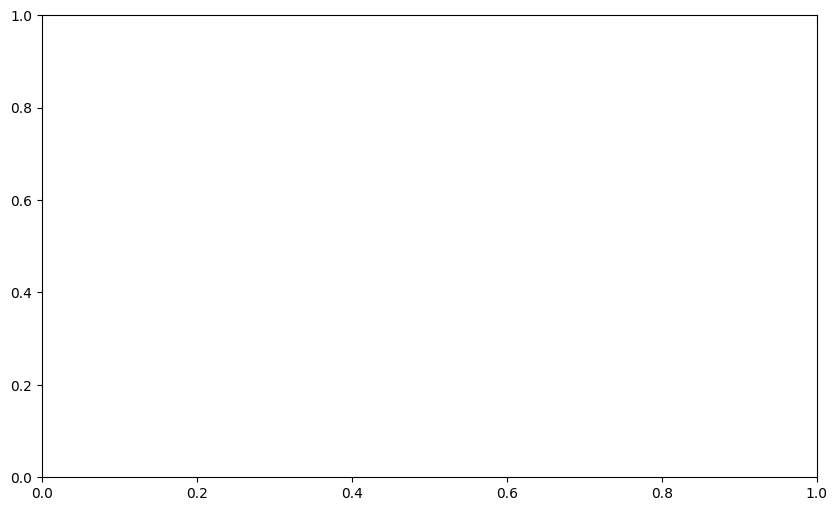

In [90]:
tt_processor.process_tts_gantt_spnv()

HashtagSeq,StartDate,EndDate,EffortH,Duration
#duckdb5,2025-02-24,2025-03-10,37,14
#duckdb8,2025-04-05,2025-04-07,13,2
#maintenance94,2025-03-25,2025-04-04,7,10


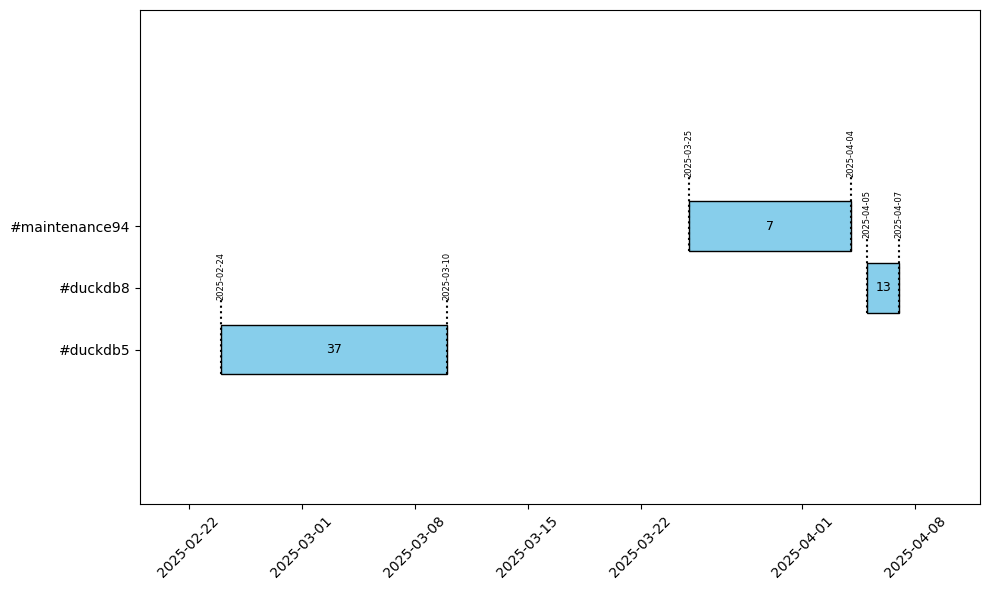

tts_gantt_hseq: Shows how much subsequent work has been performed per hashtag.
Relevant Settings: {"tts_gantt_hseq_months": 2, "tts_gantt_hseq_min_duration": 1}


In [ ]:
tt_processor.process_tts_gantt_hseq()

In [ ]:
tt_processor.process_definitions()